In [45]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [46]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [47]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [48]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


In [49]:
df.shape

(528, 6)

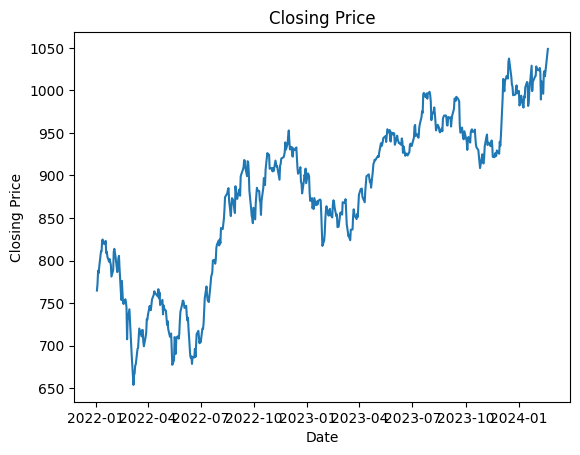

In [50]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Text(0.5, 0, 'Year')

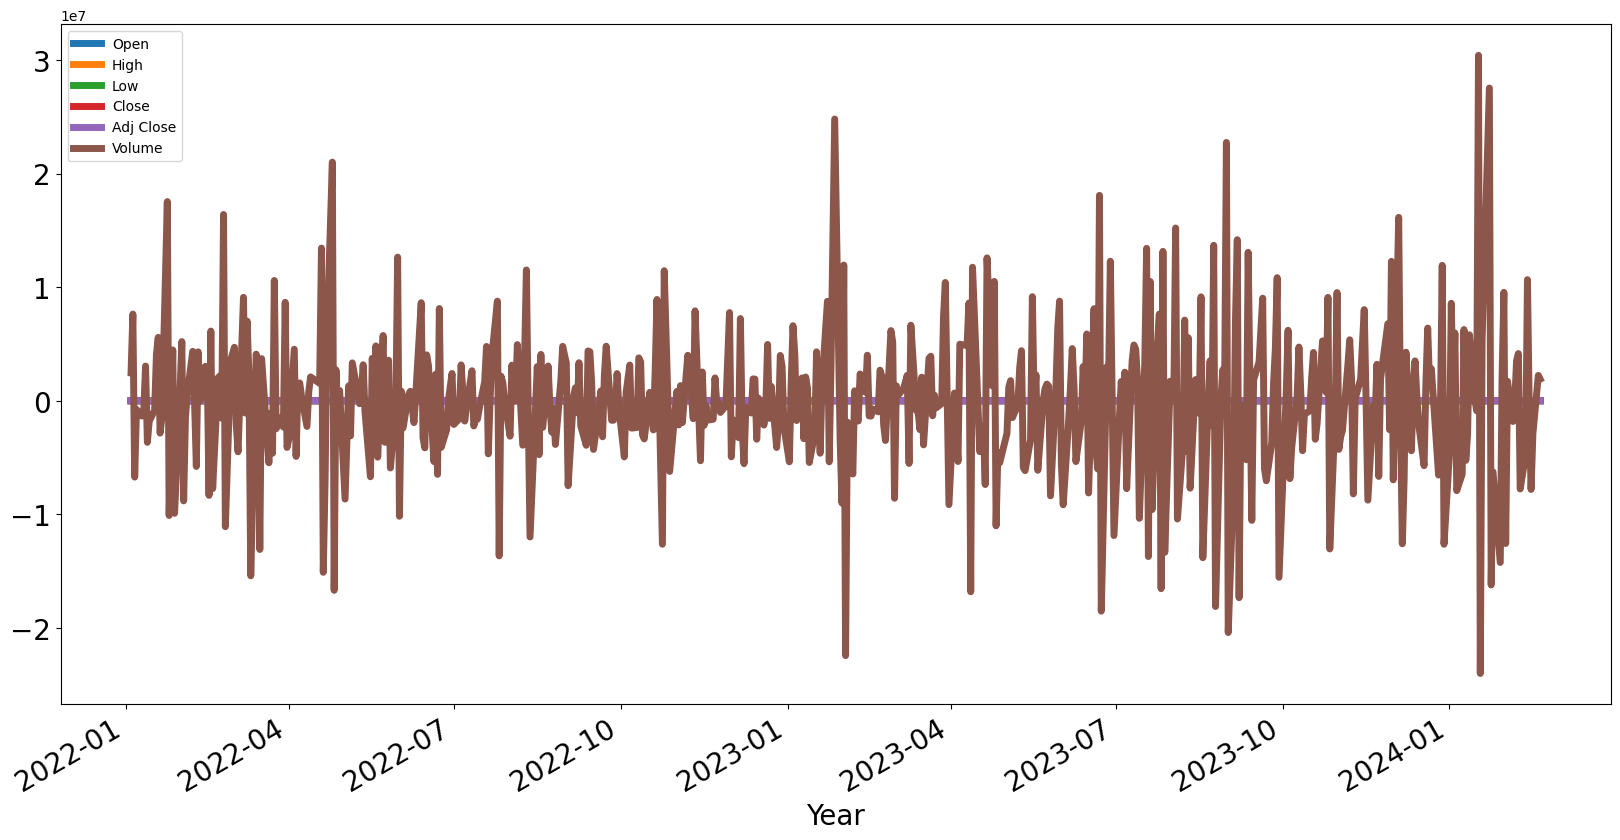

In [51]:
#First-order differencing
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'ICICIBANK Cumulative Returns')

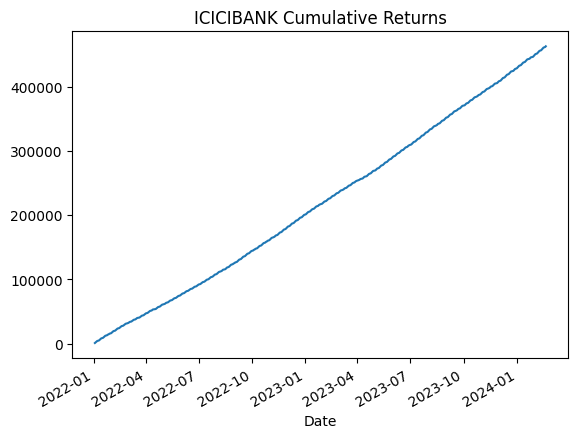

In [52]:
# Comulative Return
dr = df['Close'].cumsum()
dr.plot()
plt.title('ICICIBANK Cumulative Returns')

Text(0.5, 1.0, 'ICICIBANK Autocorrelation plot')

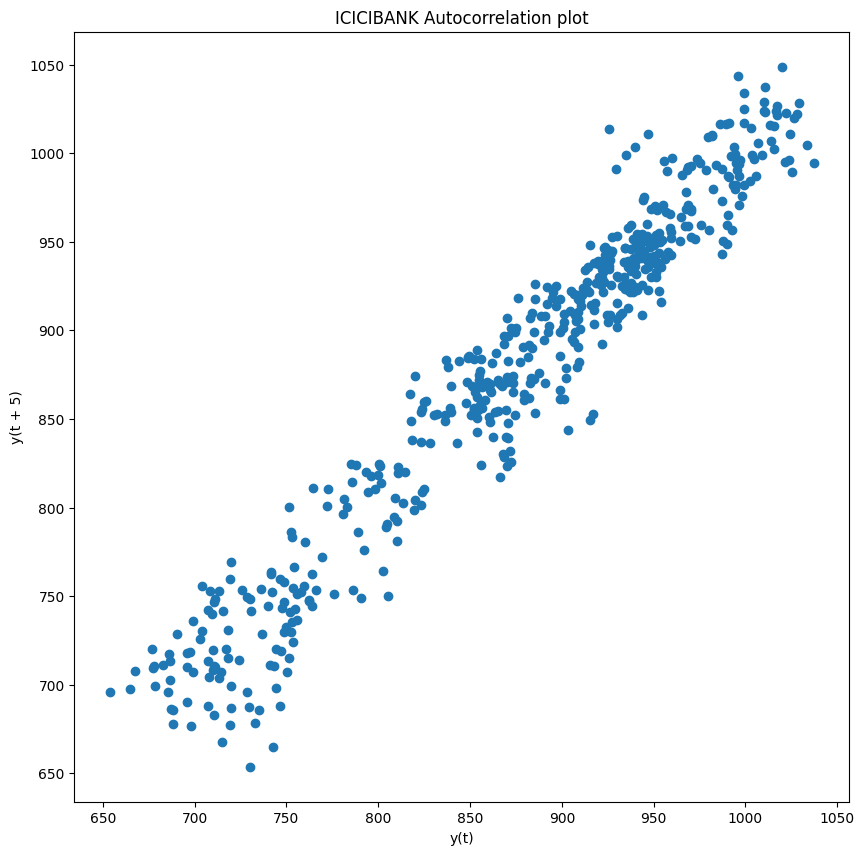

In [53]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('ICICIBANK Autocorrelation plot')

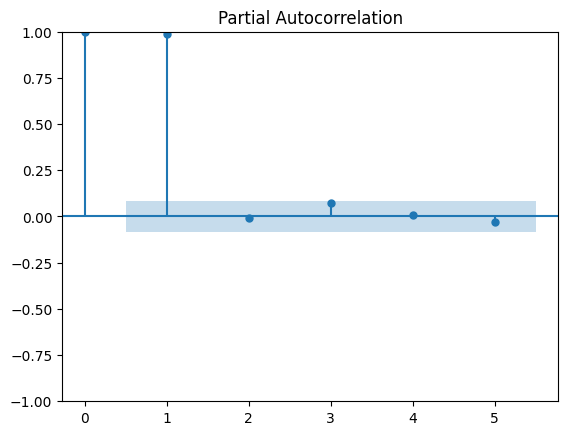

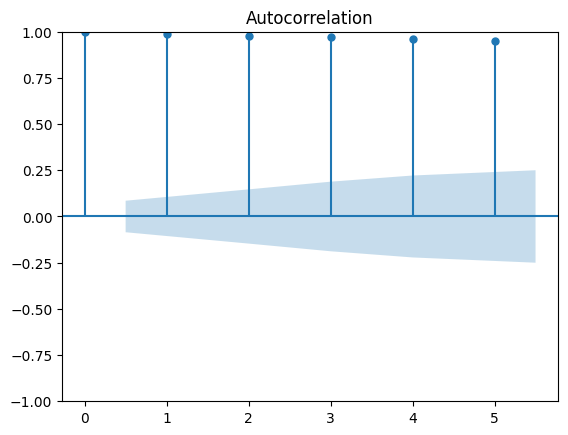

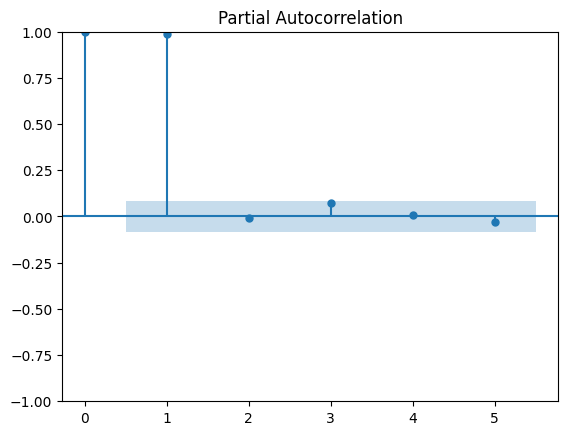

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=5)
plot_pacf(df['Close'], lags=5)

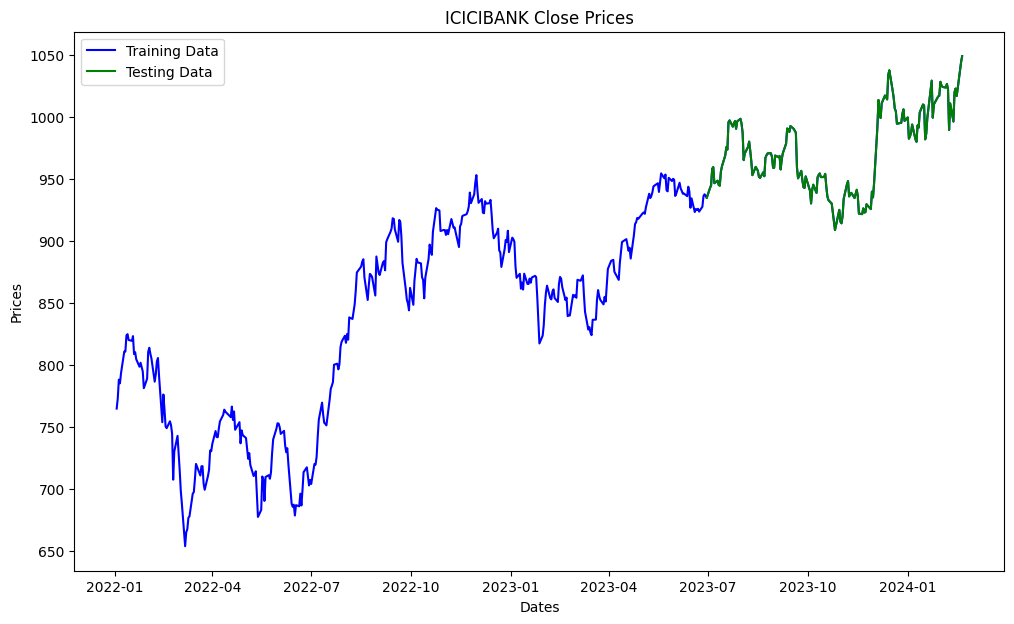

In [55]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [59]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 2, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


In [60]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 109.076
SMAE: 0.773
RMSE: 10.44394826810366
MAE: 7.544808515622536


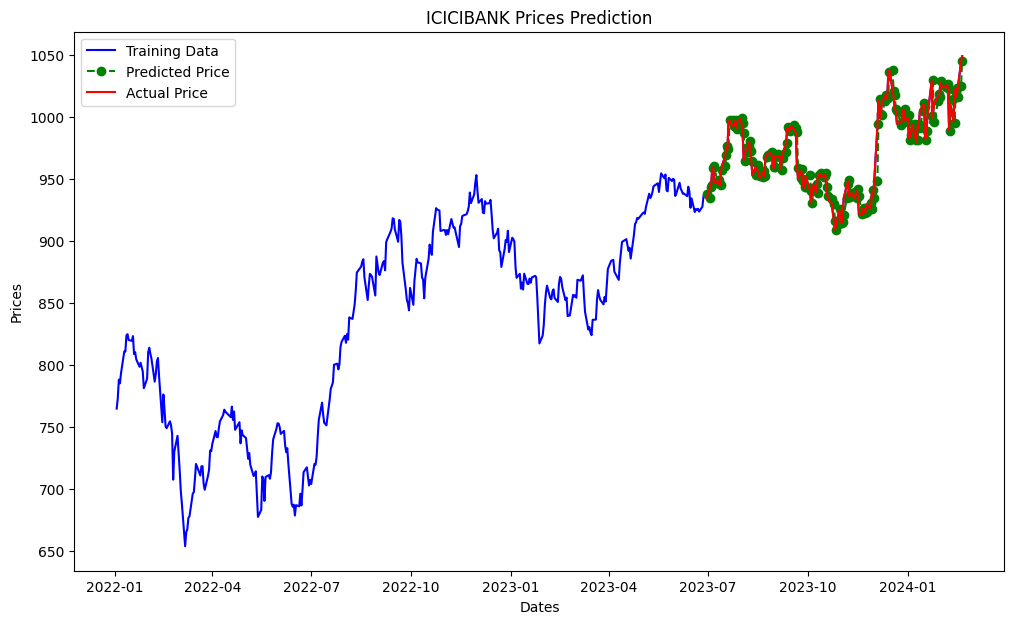

In [61]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

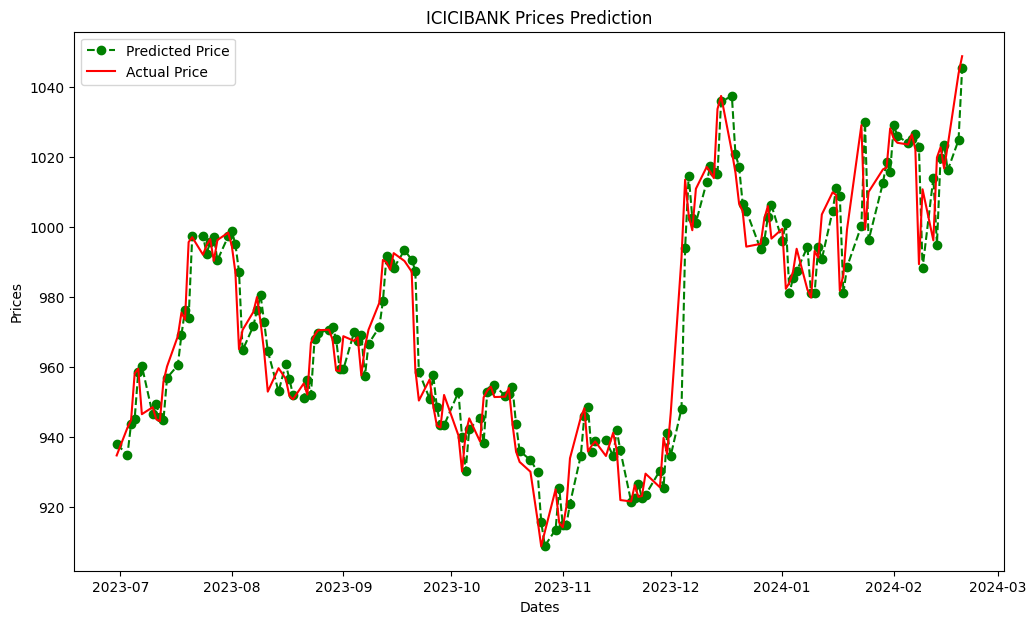

In [62]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [65]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.tail(10))

          Actual    Predicted
149  1022.150024  1026.427792
150   989.299988  1022.659556
151  1010.700012   988.127413
152   996.099976  1013.962550
153  1019.799988   994.916592
154  1022.700012  1019.705330
155  1016.650024  1023.399626
156  1023.250000  1016.155809
157  1043.750000  1024.769977
158  1048.750000  1045.264939


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [71]:

# Train ARIMA model on the entire dataset
model = ARIMA(df['Close'].values, order=(5, 2, 2))
model_fit = model.fit()

# Make predictions for the next day
next_day_prediction = model_fit.forecast(steps=1)[0]

# Print the prediction for the next day
print("Prediction for the next day:", next_day_prediction)



Prediction for the next day: 1047.8821606758506


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [72]:
# Make predictions for the next 60 days
next_60_days_predictions = model_fit.forecast(steps=60)

# Print the predictions for the next 60 days
print("Predictions for the next 60 days:")
print(next_60_days_predictions)

Predictions for the next 60 days:
[1047.88216068 1048.64351781 1049.77741902 1050.96563496 1051.0372789
 1051.93090677 1052.13367309 1053.07079821 1053.2284234  1054.13878769
 1054.31039319 1055.21782127 1055.39401584 1056.29315376 1056.47660693
 1057.36918491 1057.55932516 1058.44508903 1058.64190906 1059.5210908
 1059.72444558 1060.59714586 1060.80691521 1061.67326404 1061.88932512
 1062.74944209 1062.971675   1063.82567935 1064.05396637 1064.90197461
 1065.13620027 1065.97832679 1066.21837781 1067.05473478 1067.30050005
 1068.13119753 1068.38256807 1069.207714   1069.46458289 1070.28428316
 1070.54654552 1071.360904   1071.62845696 1072.43757554 1072.71031819
 1073.51429681 1073.79213017 1074.59106686 1074.87389383 1075.66788477
 1075.95561009 1076.74474962 1077.03727987 1077.82166051 1078.11890404
 1078.89861657 1079.20048348 1079.97561693 1080.28201904 1081.05266075]
